<font color='orange'>**DSBDAL Ass. 6 - Data Analytics III**</font><br/>

##### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

#### **0. Loading the Dataset** :

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isna().sum().sum()

0

#### **1. Splitting the Dataset** :

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)
train_x, train_y = train.drop('species', axis=1), train['species']
test_x, test_y = test.drop('species', axis=1), test['species']

#### **2. Normalizing the Dataset** :

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

#### **3. Model Training** :

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_x, train_y)
nb.score(test_x, test_y)

0.9736842105263158

##### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

#### **4. Confusion Matrix** :

In [17]:
from sklearn.metrics import confusion_matrix
pred_y = nb.predict(test_x)
conf = confusion_matrix(test_y, pred_y)

In [44]:
labels = df.species.unique()
conf_df = pd.DataFrame(conf, index=labels, columns=labels)

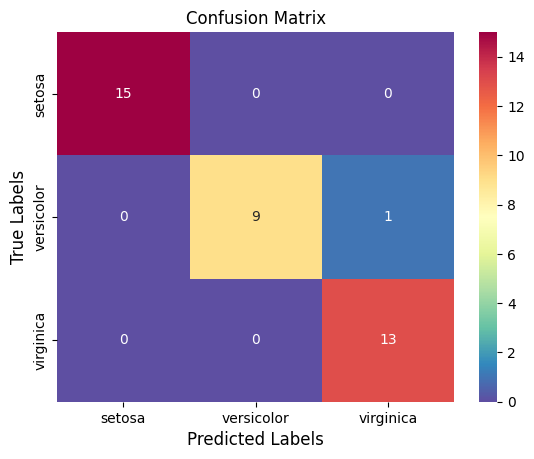

In [61]:
sns.heatmap(conf_df, cmap='Spectral_r', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Labels', size='large')
plt.xlabel('Predicted Labels', size='large');

#### **TP** :
##### Correctly predicted presence

In [147]:
tp_setosa = conf[0][0]
tp_versicolor = conf[1][1]
tp_virginica = conf[2][2]

#### **TN** :
##### Correctly predicted absence

In [148]:
tn_setosa = conf[1][1] + conf[2][2]
tn_versicolor = conf[0][0] + conf[2][2]
tn_virginica = conf[0][0] + conf[1][1]

#### **FP** :
##### Wrongly predicted presence

In [149]:
fp_setosa = conf[1][0] + conf[2][0]
fp_versicolor = conf[0][1] + conf[2][1]
fp_virginica = conf[0][2] + conf[1][2]

#### **FN** :
##### Wrongly predicted absence


In [150]:
fn_setosa = conf[0][1] + conf[0][2]
fn_versicolor = conf[1][0] + conf[1][2]
fn_virginica = conf[2][0] + conf[2][1]

In [151]:
print(tp_setosa, fp_setosa, tn_setosa, fn_setosa)

15 0 22 0


In [152]:
print(tp_versicolor, fp_versicolor, tn_versicolor, fn_versicolor)

9 0 28 1


In [153]:
print(tp_virginica, fp_virginica, tn_virginica, fn_virginica)

13 1 24 0


In [154]:
tp = tp_setosa + tp_versicolor + tp_virginica
fp = fp_setosa + fp_versicolor + fp_virginica
fn = fn_setosa + fn_versicolor + fn_virginica
tn = tn_setosa + tn_versicolor + tn_virginica

#### **5. Accuracy** :

In [155]:
(tp+tn)/(tp+tn+fp+fn)

0.9823008849557522

#### **6. Precision** :

In [156]:
p = (tp)/(tp+fp)
p

0.9736842105263158

#### **7. Recall** :

In [157]:
r = (tp)/(tp+fn)
r

0.9736842105263158

#### **8. F1 Score**:

In [158]:
2*p*r/(p+r)

0.9736842105263158

#### **9. Compare calculated values** : 

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [160]:
accuracy_score(test_y, pred_y)

0.9736842105263158

In [161]:
precision_score(test_y, pred_y, average='micro')

0.9736842105263158

In [162]:
recall_score(test_y, pred_y, average='micro')

0.9736842105263158

In [163]:
f1_score(test_y, pred_y, average='micro')

0.9736842105263158